In [50]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
from utils import *
import tensorflow.keras as keras
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
n_input = 11

YEARS = list(range(2003, 2019))

def root_mean_squared_error(y_true, y_pred):
        return keras.backend.sqrt(keras.backend.mean(keras.backend.square(y_pred - y_true), axis=-1))


In [13]:
gene_arr_path = r'../output/gene_editing/es_with_decay.array'
gene_name_path = r'../output/gene_editing/ordered_list.list'
transplant_arr_path = r'../output/transplant/es_with_decay.array'
transplant_name_path = r'../output/transplant/ordered_list.list'

gene_arr = pickle.load(open(gene_arr_path, mode='rb'))
gene_name = pickle.load(open(gene_name_path, mode='rb'))
transplant_arr = pickle.load(open(transplant_arr_path, mode='rb'))
transplant_name = pickle.load(open(transplant_name_path, mode='rb'))

gene_arr = gene_arr[:, :-1, :]
transplant_arr = transplant_arr[:, :-1, :]

print('Shape of the gene_editing array:',gene_arr.shape)
print('Shape of the transplant array:',transplant_arr.shape)

Shape of the gene_editing array: (2643, 16, 10)
Shape of the transplant array: (5141, 16, 10)


In [143]:
# scaler, data = scale_data(gene_arr, 'standard')
scaler, data = scale_data(transplant_arr, 'standard')

X, y = data[:, :n_input, :], data[:, n_input:, -2]

In [41]:
X.shape

(2643, 11, 10)

In [145]:
# rnn_model = keras.models.load_model(r'old_result_未调参\gene_100epoch.h5', compile=False)
# tree_model = pickle.load(open(r'old_result_未调参\tree_gene.pkl', 'rb'))

rnn_model = keras.models.load_model(r'old_result_未调参\transplant_100epoch.h5', compile=False)
tree_model = pickle.load(open(r'old_result_未调参\tree_transplant.pkl', 'rb'))

In [146]:
rnn_pred = rnn_model.predict(X)
tree_pred = tree_model.predict(X.reshape(len(X), -1))

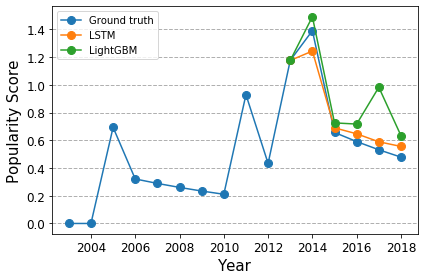

In [159]:
i = 1513

fig, ax = plt.subplots(1,1)


ax.plot(range(2003, 2019), transplant_arr[i,:,-2], marker='o', markersize=8, label='Ground truth')
ax.plot(range(2013, 2019), np.concatenate((np.expand_dims(transplant_arr[i,-6,-2], axis=0), scaler.inverse_transform(rnn_pred[i]).reshape(-1))), marker='o', markersize=8, label='LSTM')
ax.plot(range(2013, 2019), np.concatenate((np.expand_dims(transplant_arr[i,-6,-2], axis=0), scaler.inverse_transform(tree_pred[i]).reshape(-1))), marker='o', markersize=8, label='LightGBM')


ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Popularity Score', fontsize=15)
ax.grid(axis='y', ls='--', lw=1)

plt.legend()
plt.tight_layout()
plt.show()

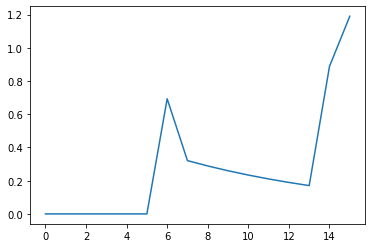

In [48]:
plt.plot(scaler.inverse_transform(data[i,:,-2]))

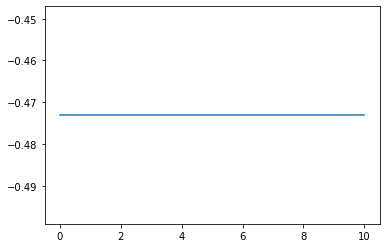

In [45]:
plt.plot(X[i,:,-2])

In [95]:
for i, j in gene_name:
    if j == 'host strain':
        print(i)

1564
